In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [50]:
df = pd.read_csv('../Data/UTF_Data3.csv', sep=';') #'hack' to go a folder back + go to the 
#exact folder
df

,Company name,Org. no,Closure year,Currency,"Num. of employees, stock company (pcs)",EBITDA (k),Working capital (k),Distributable earnings (k),Turnover change (%),Changes in staff (%),Return on equity (%),Return on total assets (%),Liability interest (%),Risk buffer total assets (k),Return on Captial Employed (RoCE) (%)
0,Ekman Invest Holding AB,5567121602,201912,SEK,301,59 472,278 276,239 355,"-8,01",0,"-3,8","1,7","2,6","-0,8","3,43"
1,Byr AB,5569479115,201912,SEK,176,376 481,867 989,809 591,"18,21","39,68","39,7","13,8","2,2","11,7","37,4"
2,Axfood Snabbgross AB,5560003575,201912,SEK,411,170 195,-36 068,7 112,"6,22","2,49","465,4","48,1","0,4","47,8","1 700,96"
3,ELON Group Holding AB (publ),5567225221,201912,SEK,146,44 918,24 435,224 302,"1,82","-2,67","4,9","1,4","0,5",1,"3,89"
4,LWW Group AB,5565295333,201912,SEK,347,22 647,297 592,239 810,"-7,27","-3,88","-3,4","-0,1","1,7","-1,8","-0,08"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2508,AKER ENERGY AS,920243754,201912,USD,152,-123 090,-113 559,-261 756,0,0,"-166,48","-39,8","18,66","-43,39","-213,27"
2509,ONEPARK AS,998638984,201912,NOK,202,25 969,22 922,49 678,0,0,"55,54","18,79","33,74","18,75","55,68"
2510,SAIPEM DRILLING NORWAY AS,998277418,201912,EUR,224,12 335,-323 038,-34 108,0,"17,89","-78,04","-1,39","5,15","-4,58","-26,92"
2511,TUSENFRYD AS,991474447,201912,NOK,134,54 762,-29 950,29 046,0,0,"6,97","9,39","13,14","5,58","61,26"


In [51]:
#2: Missing Data Percentage List
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Company name - 0.0%
Org. no - 0.0%
Closure year - 0.0%
Currency - 0.0%
Num. of employees, stock company (pcs) - 0.0%
EBITDA (k) - 0.0%
Working capital (k) - 0.0%
Distributable earnings (k) - 0.0%
Turnover change (%) - 0.0%
Changes in staff (%) - 0.0%
Return on equity (%) - 0.0%
Return on total assets (%) - 0.0%
Liability interest (%) - 0.0%
Risk buffer total assets (k) - 0.0%
Return on Captial Employed (RoCE) (%) - 0.0%


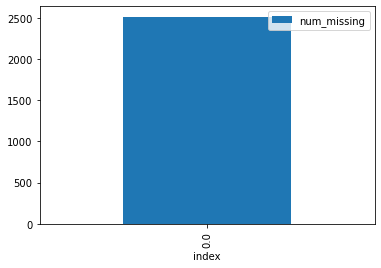

In [56]:
#3: Missing Data Histogram

# first create missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

#THERE IS NO MISSING VALUES

In [57]:
# drop rows with a lot of missing values.
ind_missing = df[df['num_missing'] > 35].index
df_less_missing_rows = df.drop(ind_missing, axis=0)

In [54]:
df.num_missing.describe()

count    2513.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: num_missing, dtype: float64

In [39]:
df.drop(columns=df.columns[((df==0).mean()>0.8)],axis=1) #dropping the columns with < 80% values 

,Company name,Org. no,Last annual report,Currency,"Num. of employees, stock company 2020 (pcs)","Num. of employees, stock company 2019 (pcs)","Num. of employees, stock company 2018 (pcs)","Num. of employees, stock company 2017 (pcs)","Num. of employees, stock company 2016 (pcs)","Num. of employees, stock company 2015 (pcs)",...,Return on Captial Employed (RoCE) 2019 (%),Return on Captial Employed (RoCE) 2018 (%),Return on Captial Employed (RoCE) 2017 (%),Return on Captial Employed (RoCE) 2016 (%),Return on Captial Employed (RoCE) 2015 (%),Return on Captial Employed (RoCE) 2014 (%),Return on Captial Employed (RoCE) 2013 (%),Return on Captial Employed (RoCE) 2012 (%),Return on Captial Employed (RoCE) 2011 (%),Return on Captial Employed (RoCE) 2010 (%)
0,Ekman Invest Holding AB,5567121602,201912,SEK,-,301,0,283,279,43,...,"3,43","8,95","9,24","6,77","33,01","5,79","7,45","7,84","7,04","7,97"
1,Byr AB,5569479115,201912,SEK,-,176,126,100,86,0,...,"37,4","31,07","43,59","36,35","35,61","99,82",-,-,-,-
2,Axfood Snabbgross AB,5560003575,201912,SEK,-,411,401,384,365,335,...,"1 700,96","1 977,05","3 050,93","3 927,16","4 503,1","3 900,26","3 559,03","1 093,64","2 011,52","2 549,43"
3,ELON Group Holding AB (publ),5567225221,201912,SEK,-,146,150,176,252,262,...,"3,89","3,16","6,53","8,31","10,43","10,68","10,53","-3,8","8,66","7,58"
4,LWW Group AB,5565295333,201912,SEK,-,347,361,337,332,340,...,"-0,08","4,68","6,84","6,15","4,94","5,38","2,26","2,75",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2508,AKER ENERGY AS,920243754,201912,USD,-,152,0,-,-,-,...,"-213,27","-35,88",-,-,-,-,-,-,-,-
2509,ONEPARK AS,998638984,201912,NOK,-,202,0,185,58,0,...,"55,68","27,85","8,29","-10,69","-78,22","-59,03","-150,42","-32,82",-,-
2510,SAIPEM DRILLING NORWAY AS,998277418,201912,EUR,-,224,190,230,223,225,...,"-26,92","-161,85",2 496 300,"-574,15","10,93","-138,62","2,53","-1,56",-,-
2511,TUSENFRYD AS,991474447,201912,NOK,-,134,0,35,35,33,...,"61,26","98,12","160,07","485,53","-180,42","4 997,21","0,3",-,-,-


In [40]:
# getting the names of the columns for copy/pasting into code

df.info() #shows you the name and the datatype, there is 10.000 of them, there is no nulls, it is the size of 
#...the int you can put into the cell

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2513 entries, 0 to 2512
Columns: 125 entries, Company name to Return on Captial Employed (RoCE) 2010 (%)
dtypes: int64(1), object(124)
memory usage: 2.4+ MB


In [41]:
#Checking for null values

df.isna().sum()

Company name                                   0
Org. no                                        0
Last annual report                             0
Currency                                       0
Num. of employees, stock company 2020 (pcs)    0
                                              ..
Return on Captial Employed (RoCE) 2014 (%)     0
Return on Captial Employed (RoCE) 2013 (%)     0
Return on Captial Employed (RoCE) 2012 (%)     0
Return on Captial Employed (RoCE) 2011 (%)     0
Return on Captial Employed (RoCE) 2010 (%)     0
Length: 125, dtype: int64

In [42]:
#Filling null values with 0

df = df.fillna(0) #it replaces all the nulls values with a 0 
df

,Company name,Org. no,Last annual report,Currency,"Num. of employees, stock company 2020 (pcs)","Num. of employees, stock company 2019 (pcs)","Num. of employees, stock company 2018 (pcs)","Num. of employees, stock company 2017 (pcs)","Num. of employees, stock company 2016 (pcs)","Num. of employees, stock company 2015 (pcs)",...,Return on Captial Employed (RoCE) 2019 (%),Return on Captial Employed (RoCE) 2018 (%),Return on Captial Employed (RoCE) 2017 (%),Return on Captial Employed (RoCE) 2016 (%),Return on Captial Employed (RoCE) 2015 (%),Return on Captial Employed (RoCE) 2014 (%),Return on Captial Employed (RoCE) 2013 (%),Return on Captial Employed (RoCE) 2012 (%),Return on Captial Employed (RoCE) 2011 (%),Return on Captial Employed (RoCE) 2010 (%)
0,Ekman Invest Holding AB,5567121602,201912,SEK,-,301,0,283,279,43,...,"3,43","8,95","9,24","6,77","33,01","5,79","7,45","7,84","7,04","7,97"
1,Byr AB,5569479115,201912,SEK,-,176,126,100,86,0,...,"37,4","31,07","43,59","36,35","35,61","99,82",-,-,-,-
2,Axfood Snabbgross AB,5560003575,201912,SEK,-,411,401,384,365,335,...,"1 700,96","1 977,05","3 050,93","3 927,16","4 503,1","3 900,26","3 559,03","1 093,64","2 011,52","2 549,43"
3,ELON Group Holding AB (publ),5567225221,201912,SEK,-,146,150,176,252,262,...,"3,89","3,16","6,53","8,31","10,43","10,68","10,53","-3,8","8,66","7,58"
4,LWW Group AB,5565295333,201912,SEK,-,347,361,337,332,340,...,"-0,08","4,68","6,84","6,15","4,94","5,38","2,26","2,75",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2508,AKER ENERGY AS,920243754,201912,USD,-,152,0,-,-,-,...,"-213,27","-35,88",-,-,-,-,-,-,-,-
2509,ONEPARK AS,998638984,201912,NOK,-,202,0,185,58,0,...,"55,68","27,85","8,29","-10,69","-78,22","-59,03","-150,42","-32,82",-,-
2510,SAIPEM DRILLING NORWAY AS,998277418,201912,EUR,-,224,190,230,223,225,...,"-26,92","-161,85",2 496 300,"-574,15","10,93","-138,62","2,53","-1,56",-,-
2511,TUSENFRYD AS,991474447,201912,NOK,-,134,0,35,35,33,...,"61,26","98,12","160,07","485,53","-180,42","4 997,21","0,3",-,-,-


In [36]:
#replacing the NaN values with the average 

mean_value=df['Ersättningen för revisorn 2014 (tkr)'].mean()

df['nr_item_ave']=df['nr_items'].fillna(mean_value)

KeyError: 'Ersättningen för revisorn 2014 (tkr)'

In [37]:
#removing the dash values 
df['var'] = pd.to_numeric(df['var'], errors='coerce')

KeyError: 'var'

In [38]:
#Visualizing X column with outliers - skewed spread! 

plt.figure(figsize=(16,6))#defining the size of the visualization, to make it prettier
sns.distplot(df[''])#number of acc. years based on the entire population
#x=year,y=

KeyError: ''

<Figure size 1152x432 with 0 Axes>